In [1]:
import numpy as np 
from random import randint
import matplotlib.pyplot as plt
import mlrose_hiive
# from mlrose_hiive import random_hill_climb, genetic_alg, mimic, simulated_annealing
import time
import warnings

In [47]:
np.random.seed(123)

RHC = mlrose_hiive.random_hill_climb
SA = mlrose_hiive.simulated_annealing
GA = mlrose_hiive.genetic_alg
MIMIC = mlrose_hiive.mimic

FlipFlop =  mlrose_hiive.FlipFlop() # GA
ContinuousPeaks = mlrose_hiive.ContinuousPeaks() # SA
FourPeaks = mlrose_hiive.FourPeaks() #MIMIC
knapsack = mlrose_hiive.Knapsack

exp_decay = mlrose_hiive.ExpDecay()
DiscreteOpt = mlrose_hiive.DiscreteOpt

rhc_fitness = []
sa_fitness = []
ga_fitness = []
mimic_fitness = []

rhc_time = []
sa_time = []
ga_time = []
mimic_time = []

In [48]:
flipflop_range =  range(10, 200, 10)
fourpeaks_range = range(10, 200, 10)
continuouspeak_range = range(10, 200, 10)
knapsack_range = range(10, 100, 10)

### Change the target variable to the current problem for plotting ###
# FlipFlop, FourPeaks, ContinuousPeaks, knapsack
target_range = knapsack_range
fitness = knapsack

### Change the target_name to the problem set you are working on: ###
# FlipFlop_, FourPeaks_, ContinuousPeaks_ , Knapsack_
target_name = str('Knapsack_')


In [49]:
# Knapsack 
max_attempts = 100
max_iters = 10000
pop_size = 200

weights = np.random.rand(200)
values = np.random.rand(200)

for i in target_range:
	fitness = mlrose_hiive.Knapsack(weights[:i], values[:i], 0.6)
	problem = DiscreteOpt(length = i, fitness_fn = fitness, maximize = True, max_val = 2)
	problem.set_mimic_fast_mode(True)
	init = np.random.randint(2, size = i)

	# RHC
	start = time.time()
	_, rhc_best, _ = RHC(problem, init_state = init, max_attempts = max_attempts, max_iters = max_iters, curve = True)
	end = time.time()
	rhc_total_time = end - start

	# SA
	start = time.time()
	_, sa_best, _ = SA(problem, schedule = exp_decay, init_state = init, max_attempts = max_attempts, max_iters = max_iters, curve = True)
	end = time.time()
	sa_total_time = end - start

	# GA
	start = time.time()
	_, ga_best, _ = GA(problem, pop_size= i, max_attempts = max_attempts, curve = True)
	end = time.time()
	ga_total_time = end - start

	# MIMIC
	start = time.time()
	_, mimic_best, _ = MIMIC(problem, pop_size = 7.5*i, max_attempts = max_attempts, curve = True)
	end = time.time()
	mimic_total_time = end - start

	rhc_fitness.append(rhc_best)
	sa_fitness.append(sa_best)
	ga_fitness.append(ga_best)
	mimic_fitness.append(mimic_best)

	rhc_time.append(rhc_total_time)
	sa_time.append(sa_total_time)
	ga_time.append(ga_total_time)
	mimic_time.append(mimic_total_time)

In [50]:
rhc_fitness = np.array(rhc_fitness)
sa_fitness = np.array(sa_fitness)
ga_fitness = np.array(ga_fitness)
mimic_fitness = np.array(mimic_fitness)

rhc_time = np.array(rhc_time)
sa_time = np.array(sa_time)
ga_time = np.array(ga_time)
mimic_time = np.array(mimic_time)

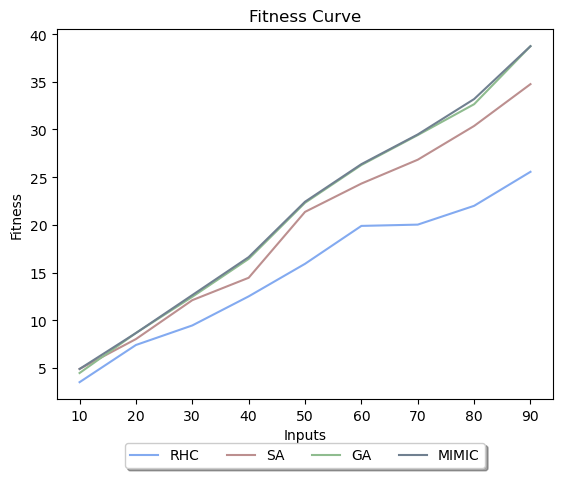

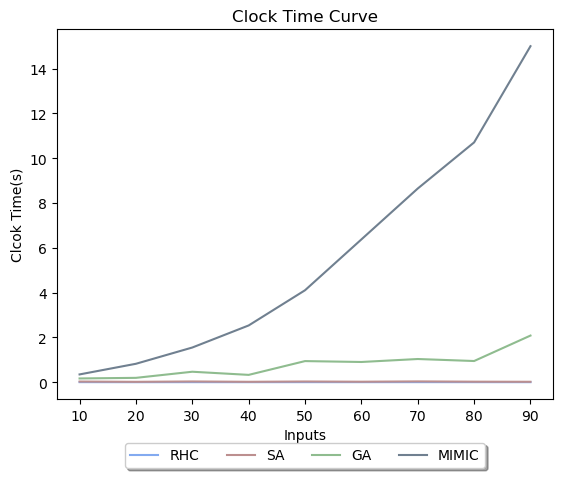

In [51]:
plt.figure()
plt.plot(target_range, rhc_fitness, label = 'RHC', color = 'cornflowerblue', alpha = 0.8)
plt.plot(target_range, sa_fitness, label = 'SA', color= 'rosybrown')
plt.plot(target_range, ga_fitness, label = 'GA', color = 'darkseagreen')
plt.plot(target_range, mimic_fitness, label = 'MIMIC', color = 'slategrey')
plt.title('Fitness Curve')
plt.xlabel('Inputs')
plt.ylabel('Fitness')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
plt.savefig(target_name + 'all_opt_fitness.png', bbox_inches="tight")

plt.figure()
plt.plot(target_range, rhc_time, label = 'RHC', color = 'cornflowerblue', alpha = 0.8)
plt.plot(target_range, sa_time, label = 'SA', color= 'rosybrown')
plt.plot(target_range, ga_time, label = 'GA', color = 'darkseagreen')
plt.plot(target_range, mimic_time, label = 'MIMIC', color = 'slategrey')
plt.title('Clock Time Curve')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
plt.xlabel('Inputs')
plt.ylabel('Clcok Time(s)')
plt.savefig(target_name + 'clocktime.png', bbox_inches="tight")

Done_RHC
Done_SA
Done_GA
Done_MIMIC


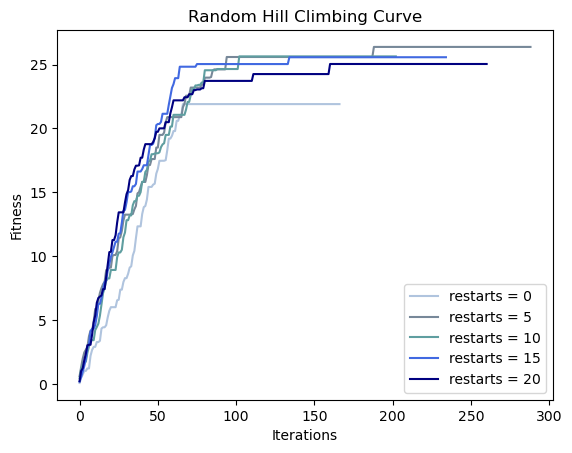

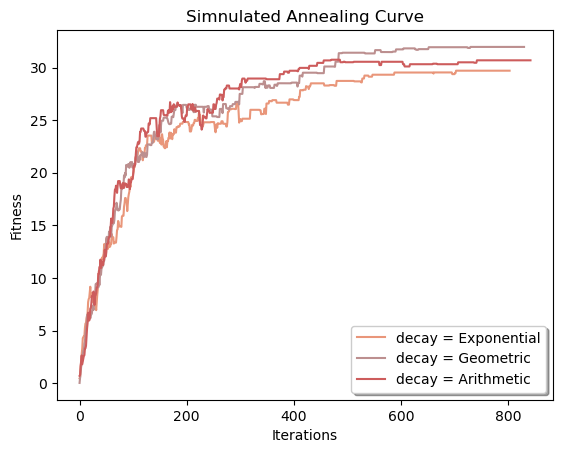

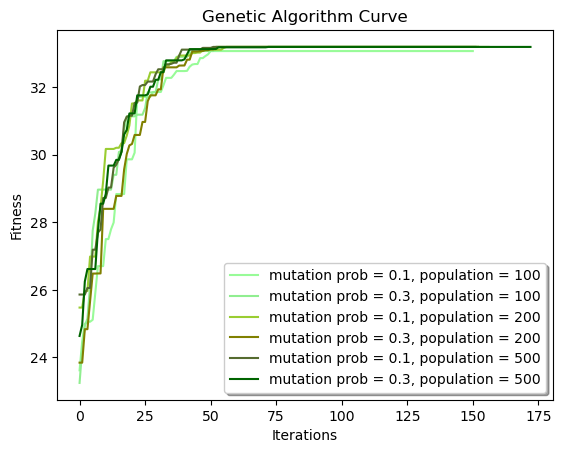

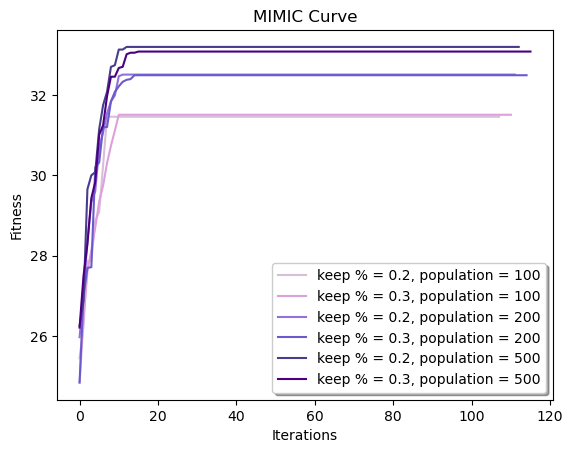

In [52]:
## Plot variation in performance with changing hyper-parameters
problem_size = 80
init = np.zeros((problem_size,), dtype=int)
fitness = knapsack(weights[:problem_size], values[:problem_size], 0.6)
problem = DiscreteOpt(length = problem_size, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)


# RHC 
_, _, rhc_fit_curve_1 = RHC(problem, init_state = init, restarts = 0, max_attempts = max_attempts, max_iters = max_iters, curve = True)
_, _, rhc_fit_curve_2 = RHC(problem, init_state = init, restarts = 5, max_attempts = max_attempts, max_iters = max_iters, curve = True)
_, _, rhc_fit_curve_3 = RHC(problem, init_state = init, restarts = 10, max_attempts = max_attempts, max_iters = max_iters, curve = True)
_, _, rhc_fit_curve_4 = RHC(problem, init_state = init, restarts = 15, max_attempts = max_attempts, max_iters = max_iters, curve = True)
_, _, rhc_fit_curve_5 = RHC(problem, init_state = init, restarts = 20, max_attempts = max_attempts, max_iters = max_iters, curve = True)
print('Done_RHC')

# SA
_, _, sa_fit_curve_1 = SA(problem, schedule = exp_decay, init_state = init, max_attempts = max_attempts, max_iters = max_iters,curve = True)
_, _, sa_fit_curve_2 = SA(problem, schedule = exp_decay, init_state = init, max_attempts = max_attempts, max_iters = max_iters, curve = True)
_, _, sa_fit_curve_3 = SA(problem, schedule = exp_decay, init_state = init, max_attempts = max_attempts, max_iters = max_iters,  curve = True)
print('Done_SA')

# GA
_, _, ga_fit_curve_1 = GA(problem, mutation_prob = 0.1, pop_size = 100, max_attempts = max_attempts, curve = True)
_, _, ga_fit_curve_2 = GA(problem, mutation_prob = 0.3, pop_size = 100, max_attempts = max_attempts, curve = True)
_, _, ga_fit_curve_3 = GA(problem, mutation_prob = 0.1, pop_size = 200, max_attempts = max_attempts, curve = True)
_, _, ga_fit_curve_4 = GA(problem, mutation_prob = 0.3, pop_size = 200, max_attempts = max_attempts, curve = True)
_, _, ga_fit_curve_5 = GA(problem, mutation_prob = 0.1, pop_size = 500, max_attempts = max_attempts, curve = True)
_, _, ga_fit_curve_6 = GA(problem, mutation_prob = 0.3, pop_size = 500, max_attempts = max_attempts, curve = True)
print('Done_GA')

# MIMIC
_, _, mimic_fit_curve_1 = MIMIC(problem, keep_pct = 0.2, pop_size = 100, max_attempts = max_attempts, curve = True)
_, _, mimic_fit_curve_2 = MIMIC(problem, keep_pct = 0.3, pop_size = 100, max_attempts = max_attempts, curve = True)
_, _, mimic_fit_curve_3 = MIMIC(problem, keep_pct = 0.2, pop_size = 200, max_attempts = max_attempts, curve = True)
_, _, mimic_fit_curve_4 = MIMIC(problem, keep_pct = 0.3, pop_size = 200, max_attempts = max_attempts, curve = True)
_, _, mimic_fit_curve_5 = MIMIC(problem, keep_pct = 0.2, pop_size = 500, max_attempts = max_attempts, curve = True)
_, _, mimic_fit_curve_6 = MIMIC(problem, keep_pct = 0.3, pop_size = 500, max_attempts = max_attempts, curve = True)
print('Done_MIMIC')


# RHC
plt.figure()
plt.plot(rhc_fit_curve_1[:,0], label = 'restarts = 0', color = 'lightsteelblue')
plt.plot(rhc_fit_curve_2[:,0], label = 'restarts = 5', color = 'lightslategray')
plt.plot(rhc_fit_curve_3[:,0], label = 'restarts = 10', color = 'cadetblue')
plt.plot(rhc_fit_curve_4[:,0], label = 'restarts = 15', color= 'royalblue')
plt.plot(rhc_fit_curve_5[:,0], label = 'restarts = 20', color = 'navy')
plt.title('Random Hill Climbing Curve')
plt.legend(loc = 'lower right')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig(target_name + 'rhc.png', bbox_inches="tight")


# SA
plt.figure()
plt.plot(sa_fit_curve_1[:,0], label = 'decay = Exponential', color = 'darksalmon')
plt.plot(sa_fit_curve_2[:,0], label = 'decay = Geometric', color = 'rosybrown')
plt.plot(sa_fit_curve_3[:,0], label = 'decay = Arithmetic', color = 'indianred')
plt.title('Simnulated Annealing Curve')
plt.legend(loc='lower right', fancybox=True, shadow=True, ncol=1)
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig(target_name + 'sa.png', bbox_inches="tight")


# GA
plt.figure()
plt.plot(ga_fit_curve_1[:,0], label = 'mutation prob = 0.1, population = 100', color = 'palegreen')
plt.plot(ga_fit_curve_2[:,0], label = 'mutation prob = 0.3, population = 100', color = 'lightgreen')
plt.plot(ga_fit_curve_3[:,0], label = 'mutation prob = 0.1, population = 200', color = 'yellowgreen')
plt.plot(ga_fit_curve_4[:,0], label = 'mutation prob = 0.3, population = 200', color = 'olive')
plt.plot(ga_fit_curve_5[:,0], label = 'mutation prob = 0.1, population = 500', color = 'darkolivegreen')
plt.plot(ga_fit_curve_6[:,0], label = 'mutation prob = 0.3, population = 500', color = 'darkgreen')
plt.title('Genetic Algorithm Curve')
plt.legend(loc='lower right', fancybox=True, shadow=True, ncol=1)
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig(target_name + 'ga.png', bbox_inches="tight")


# MIMIC
plt.figure()
plt.plot(mimic_fit_curve_1[:,0], label = 'keep % = 0.2, population = 100', color = 'thistle')
plt.plot(mimic_fit_curve_2[:,0], label = 'keep % = 0.3, population = 100', color = 'plum')
plt.plot(mimic_fit_curve_3[:,0], label = 'keep % = 0.2, population = 200', color = 'mediumpurple')
plt.plot(mimic_fit_curve_4[:,0], label = 'keep % = 0.3, population = 200', color = 'slateblue')
plt.plot(mimic_fit_curve_5[:,0], label = 'keep % = 0.2, population = 500', color = 'darkslateblue')
plt.plot(mimic_fit_curve_6[:,0], label = 'keep % = 0.3, population = 500', color = 'indigo')
plt.title('MIMIC Curve')
plt.legend(loc='lower right', fancybox=True, shadow=True, ncol=1)
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig(target_name+'mimic.png', bbox_inches="tight")


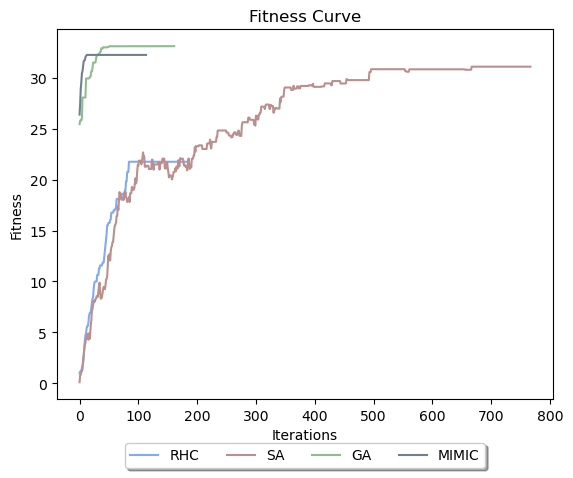

In [53]:
# Knapsack
## Plot change with respect to iterations
problem_size = 80
init = np.zeros((problem_size,), dtype=int)
fitness = knapsack(weights[:problem_size], values[:problem_size], 0.6)
problem = DiscreteOpt(length = problem_size, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)

_, _, fitness_curve_sa = SA(problem, schedule = exp_decay, init_state = init, max_attempts = max_attempts, max_iters = max_iters, curve = True)
_, _, fitness_curve_rhc = RHC(problem, init_state = init, max_attempts = max_attempts, max_iters = max_iters, curve = True)
_, _, fitness_curve_ga = GA(problem, max_attempts = max_attempts, curve = True)
_, _, fitness_curve_mimic = MIMIC(problem, pop_size = pop_size, max_attempts = max_attempts, curve = True)


plt.figure()
plt.plot(fitness_curve_rhc[:,0], label = 'RHC', color = 'cornflowerblue', alpha = 0.8)
plt.plot(fitness_curve_sa[:,0], label = 'SA', color= 'rosybrown')
plt.plot(fitness_curve_ga[:,0], label = 'GA', color = 'darkseagreen')
plt.plot(fitness_curve_mimic[:,0], label = 'MIMIC', color = 'slategrey')
plt.title('Fitness Curve')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig(target_name + 'iterations.png', bbox_inches="tight")